In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage.segmentation import (morphological_chan_vese,
                                  checkerboard_level_set)
from sklearn.linear_model import LinearRegression

In [2]:
#folder = "/Users/cdesio/UoB/DARK-LANA/Dark/Field_10x10"
folder = "/Users/yw18581/DARK-LANA/Dark/Field_10x10"

In [2]:
folder = '/storage/yw18581/data/demonstrator/'

In [3]:
fnames = sorted(os.listdir(folder))

In [4]:
def groupby(X, y, key="max"):
    y = np.asarray(y)
    X = np.asarray(X)
    y_uniques = np.unique(y)
    if key=="max":
        y_out = [np.max(X[y==yi]) for yi in y_uniques]
    elif key=="min":
        y_out = [np.min(X[y==yi]) for yi in y_uniques]
    return y_uniques, y_out

In [5]:
def show_img_cont(image,ls):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(image, cmap="gray")
    #ax.set_axis_off()
    ax.contour(ls,[0.5], colors='r')
    #ax.set_title("Morphological ACWE segmentation", fontsize=12)
    plt.show()
    return

In [6]:
img = imread(os.path.join(folder, fnames[0]))

In [7]:
init_ls =  checkerboard_level_set(img.shape, 5)
ls = morphological_chan_vese(img, 20, init_level_set=init_ls, smoothing=10)

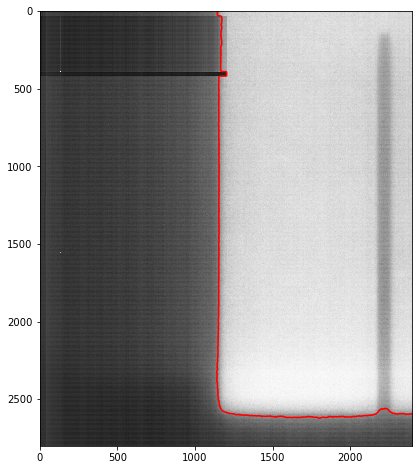

In [8]:
show_img_cont(img,ls)

In [9]:
cut = ls[500:750,400:1800]

(250, 0)

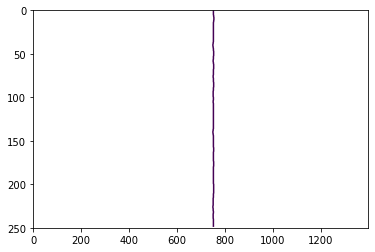

In [10]:
plt.contour(cut,[0.5])
#plt.xlim(300,2000)
plt.ylim(250,0)

In [11]:
a = np.argwhere(cut)

In [12]:
x_new, y_new = groupby(a[:,0],a[:,1])

(300, 0)

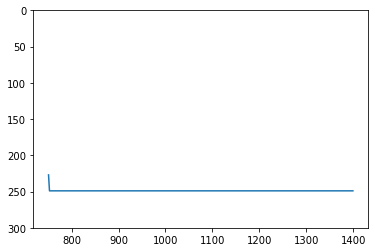

In [13]:
plt.plot(x_new,y_new)
plt.ylim(300,0)